In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd

In [ ]:
path = '/content/gdrive/MyDrive/Colab Notebooks/clearwater'

os.listdir(path)

['landslides.csv',
 'quads.dbf',
 'quads.shp',
 'streams.dbf',
 'streams.shp',
 'streams.shx',
 'quads.shx',
 '__MACOSX']

In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install libpysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 25.2 MB/s eta 0:00:00


In [ ]:
pip install mgwr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.2/220.2 kB 20.2 MB/s eta 0:00:00
  Created wheel for mgwr: filename=mgwr-2.1.2-py3-none-any.whl size=46365 sha256=cec7bdf74ad5bd315c94c9f8fb6821ee978c6f3f30af01c60efcb0fd903382fd
  Stored in directory: /root/.cache/pip/wheels/4d/43/6e/bd2d0e1ccee77089e0b266ebc4948d9a90ef363e0be23663aa
  Created wheel for spglm: filename=spglm-1.0.8-py3-none-any.whl size=38785 sha256=10bd01ac3b25181c10ef3f0115d7fd4e2ee40a6c863fbb28bd2ee508feee5579
  Stored in directory: /root/.cache/pip/wheels/a2/a7/67/07d6d6809173d768c16235f813520d6a4053984a160aa933fa
Successfully built mgwr spglm


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 49.5 MB/s eta 0:00:00


In [ ]:
# Install semua library yang dibutuhkan: numpy, matplotlib, pandas, mgwr, geopandas dan libpysal
# Gunakan perintah: pip install libpysal (sebagai contoh)
import numpy as np
import libpysal as ps
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import geopandas as gp

from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW

Mounted at /content/drive


<Axes: >

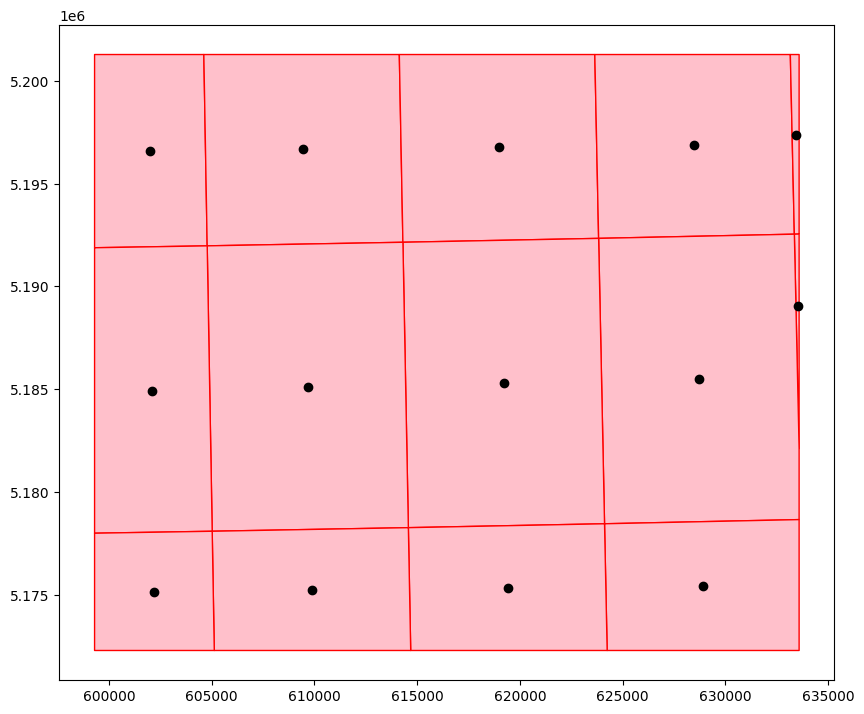

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
datacw=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/clearwater/landslides.csv')
datacw.head()
cw_shp=gp.read_file('/content/drive/MyDrive/Colab Notebooks/clearwater/quads.shp')
fig, ax = plt.subplots(figsize=(10,10))
cw_shp.plot(ax=ax, **{'edgecolor':'red', 'facecolor':'pink'})
cw_shp.centroid.plot(ax=ax, c='black')

Mounted at /content/drive


<Axes: >

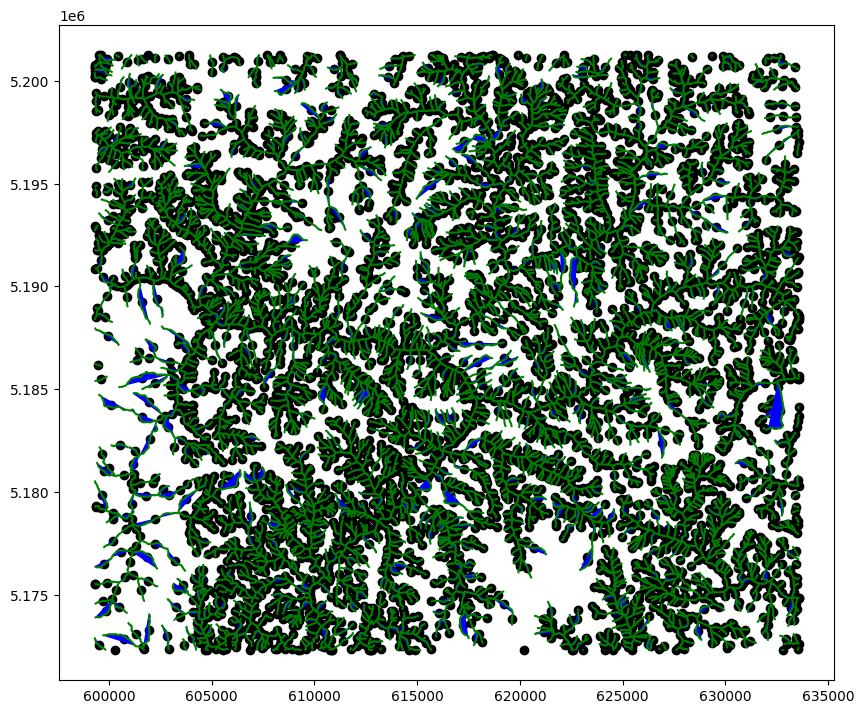

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
datacw=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/clearwater/landslides.csv')
datacw.head()
st_shp=gp.read_file('/content/drive/MyDrive/Colab Notebooks/clearwater/streams.shp')
fig, ax = plt.subplots(figsize=(10,10))
st_shp.plot(ax=ax, **{'edgecolor':'green', 'facecolor':'blue'})
st_shp.centroid.plot(ax=ax, c='black')

In [ ]:
# Tentukan variabel bebas dan terikatnya
g_y = datacw['Elev'].values.reshape((-1,1))
g_X = datacw[['Slope', 'SinAspct', 'CosAspct']].values
# Tentukan Latitude dan Longitude
u = datacw['X']
v = datacw['Y']
g_coords = list(zip(u,v))

g_X = (g_X - g_X.mean(axis=0)) / g_X.std(axis=0)

g_y = g_y.reshape((-1,1))

g_y = (g_y - g_y.mean(axis=0)) / g_y.std(axis=0)

In [ ]:
# Kalibrate GWR model
gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
gwr_results = GWR(g_coords, g_y, g_X, gwr_bw).fit()

44.0


In [ ]:
gwr_results.params[0:60]

array([[ 6.68917772e-01,  1.56205248e-01, -1.93596511e-01,
         1.57050111e-01],
       [ 7.03425876e-01, -3.31937576e-01, -1.12118718e-02,
        -8.04058043e-02],
       [ 6.36537232e-01,  1.61071563e-01, -1.81007564e-01,
         9.09575597e-02],
       [ 6.75419982e-01,  1.69350438e-01, -1.91459956e-01,
         9.91877167e-02],
       [ 5.75032470e-01,  1.41397797e-01, -1.59089177e-01,
         6.94156197e-02],
       [ 7.35156227e-01,  1.75146112e-01, -2.07006081e-01,
         1.08313485e-01],
       [ 3.88955088e-01,  9.75544498e-02, -6.80791176e-02,
         3.57573988e-02],
       [ 3.36186262e-01, -1.03377608e-01,  5.61070999e-02,
        -7.20757032e-03],
       [ 1.11257117e-01, -9.09387274e-03,  1.53118049e-01,
        -7.02816475e-02],
       [ 4.33669716e-02,  1.01660913e-02,  1.86703193e-01,
        -1.01900314e-01],
       [ 3.89725891e-01,  7.75952666e-02, -5.11731727e-02,
        -5.33750384e-02],
       [ 3.96888882e-01,  6.93005071e-02, -4.99499464e-02,
      

In [ ]:
gwr_results.localR2[0:10]

array([[0.45272703],
       [0.48715549],
       [0.44347056],
       [0.43878454],
       [0.43597402],
       [0.41271618],
       [0.36830782],
       [0.41222942],
       [0.40122689],
       [0.41490011]])

In [ ]:
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 239
Number of covariates:                                                     4

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            233.973
Log-likelihood:                                                    -336.586
AIC:                                                                681.172
AICc:                                                               683.429
BIC:                                                              -1052.996
R2:                                                                   0.021
Adj. R2:                                                              0.009

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------